In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

diamonds=pd.read_csv('diamonds.csv')

# Putting target variable 'price' to the end of the dataset

temp=diamonds.price
diamonds.drop(['price'],axis=1,inplace=True)
diamonds['price']=temp

diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
diamonds.head()

#Dropping diamonds that don't have any dimensions

diamonds.drop(diamonds[diamonds['x']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['z']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['y']==0].index,inplace=True)

In [70]:
# OneHotEncoded columns

df=pd.get_dummies(diamonds,columns=['cut','color','clarity'])
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2757,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,2757,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,2757,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# Putting target variable 'price' to the end of the dataset

temp=df.price
df.drop(['price'],axis=1,inplace=True)
df['price']=temp
df.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


In [72]:
# Binning done by equal price range

df['price'] = pd.cut(diamonds.price,bins=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19352,0.30,62.2,57.0,4.26,4.32,2.67,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19351,0.31,61.8,56.0,4.35,4.37,2.69,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19350,0.30,60.7,57.0,4.36,4.41,2.66,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36544,0.40,62.6,59.0,4.74,4.68,2.95,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,2.02,57.9,63.0,8.13,8.21,4.73,0,1,0,0,...,0,0,0,0,0,1,0,0,0,9
27209,2.36,60.1,59.0,8.64,8.69,5.21,0,0,1,0,...,1,0,0,0,0,0,1,0,0,9
27210,2.00,62.9,56.0,7.94,8.01,5.02,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9
27212,2.29,61.6,60.0,8.45,8.43,5.20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,9


In [73]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [74]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

In [75]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

def show_confusion_matrix(model):
    print('Accuracy: %.2f%%' % (accuracy_score(test_Y, predi) * 100))
    print('Precision: %.2f%%' % (precision_score(test_Y, predi, average='macro') * 100))
    print('Recall: %.2f%%' % (recall_score(test_Y, predi, average='macro') * 100))
    print('F1_Score: %.2f%%' % (f1_score(test_Y, predi, average='macro') * 100))
    confusion_matrix_model = confusion_matrix(test_Y, predi)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')

In [76]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
predi=knn.predict(test_X)
accuracy_score(predi,test_Y)
show_confusion_matrix(knn)

AttributeError: 'NoneType' object has no attribute 'split'

In [77]:
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
predi=gnb.predict(test_X)
accuracy_score(predi,test_Y)

0.6996476261127597

Accuracy: 69.96%
Precision: 39.65%
Recall: 38.32%
F1_Score: 32.44%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


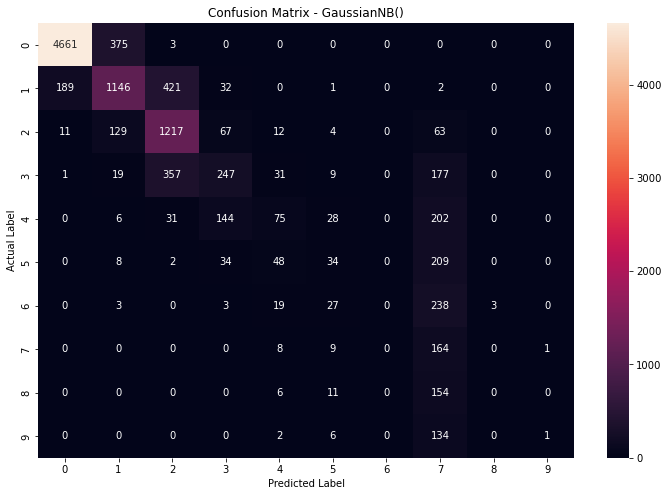

In [78]:
show_confusion_matrix(gnb)

In [79]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
predi=dt.predict(test_X)
accuracy_score(predi,test_Y)

0.8384643916913946

Accuracy: 83.85%
Precision: 63.49%
Recall: 63.52%
F1_Score: 63.46%


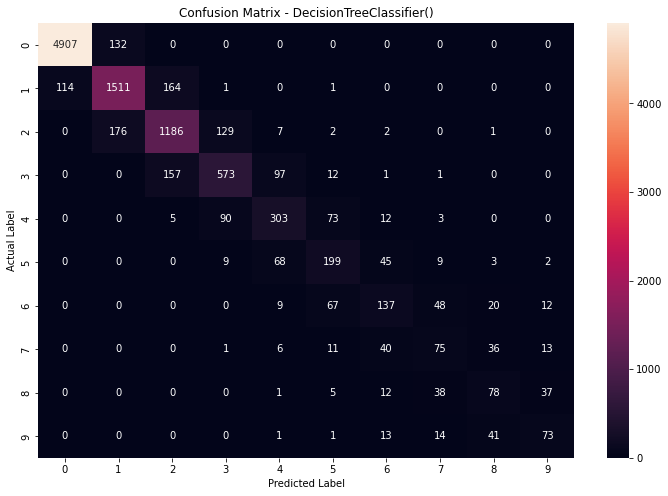

In [80]:
show_confusion_matrix(dt)

In [81]:
xgboost=XGBClassifier()
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.8717544510385756

Accuracy: 87.18%
Precision: 68.63%
Recall: 69.00%
F1_Score: 68.76%


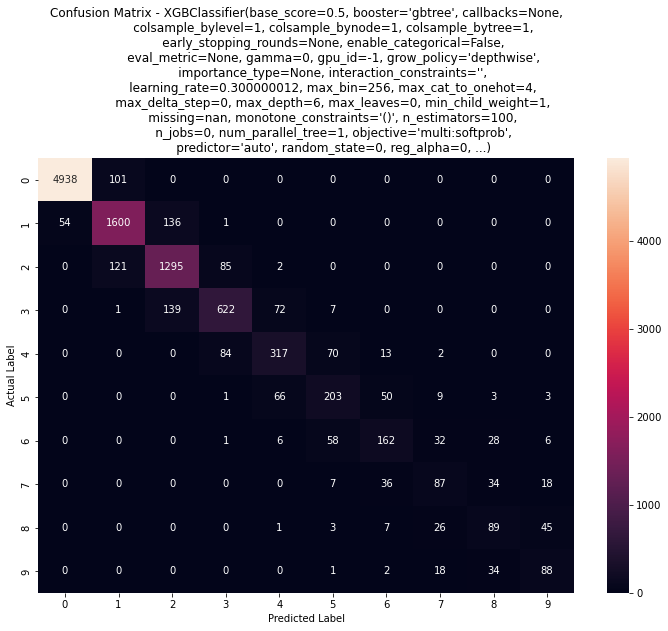

In [82]:
show_confusion_matrix(xgboost)

In [83]:
randomforest=RandomForestClassifier()
randomforest.fit(train_X,train_Y)
predi=randomforest.predict(test_X)
accuracy_score(predi,test_Y)

0.8750927299703264

Accuracy: 87.51%
Precision: 69.97%
Recall: 70.67%
F1_Score: 70.24%


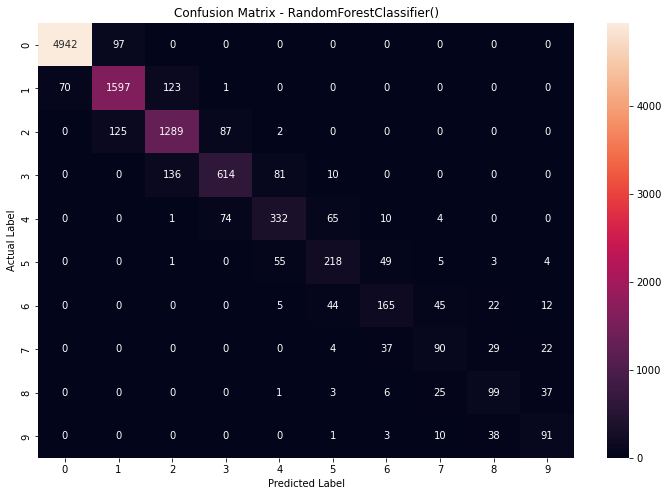

In [84]:
show_confusion_matrix(randomforest)

In [85]:
gradientboosting=GradientBoostingClassifier()
gradientboosting.fit(train_X,train_Y)
predi=gradientboosting.predict(test_X)
accuracy_score(predi,test_Y)

0.8372589020771514

Accuracy: 83.73%
Precision: 60.80%
Recall: 59.85%
F1_Score: 60.24%


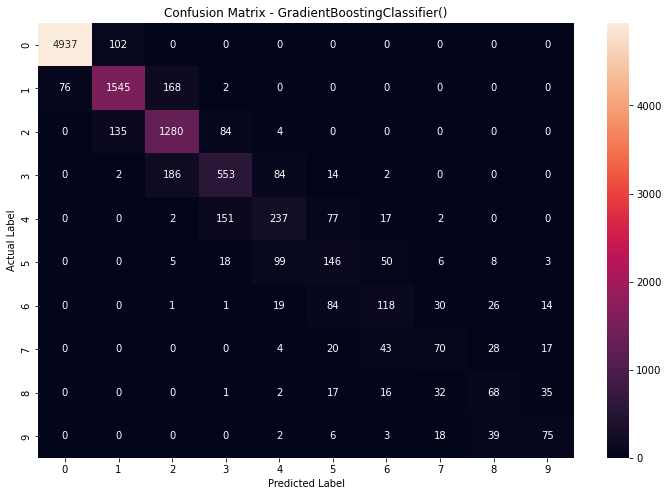

In [86]:
show_confusion_matrix(gradientboosting)

In [87]:
adaboost=AdaBoostClassifier()
adaboost.fit(train_X,train_Y)
predi=adaboost.predict(test_X)
accuracy_score(predi,test_Y)

0.6057121661721068

Accuracy: 60.57%
Precision: 16.53%
Recall: 19.95%
F1_Score: 14.92%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


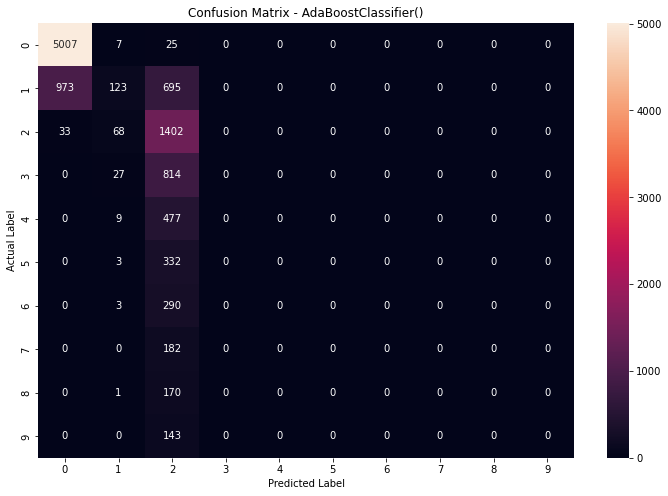

In [88]:
show_confusion_matrix(adaboost)